In [1]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import urllib.request
import pandas as pd

mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def load_data(path='.'):
    csv_path = os.path.join(path, "insurance.csv")
    return pd.read_csv(csv_path)

data = load_data()
data.head()




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
data["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Saving figure attr_histograms


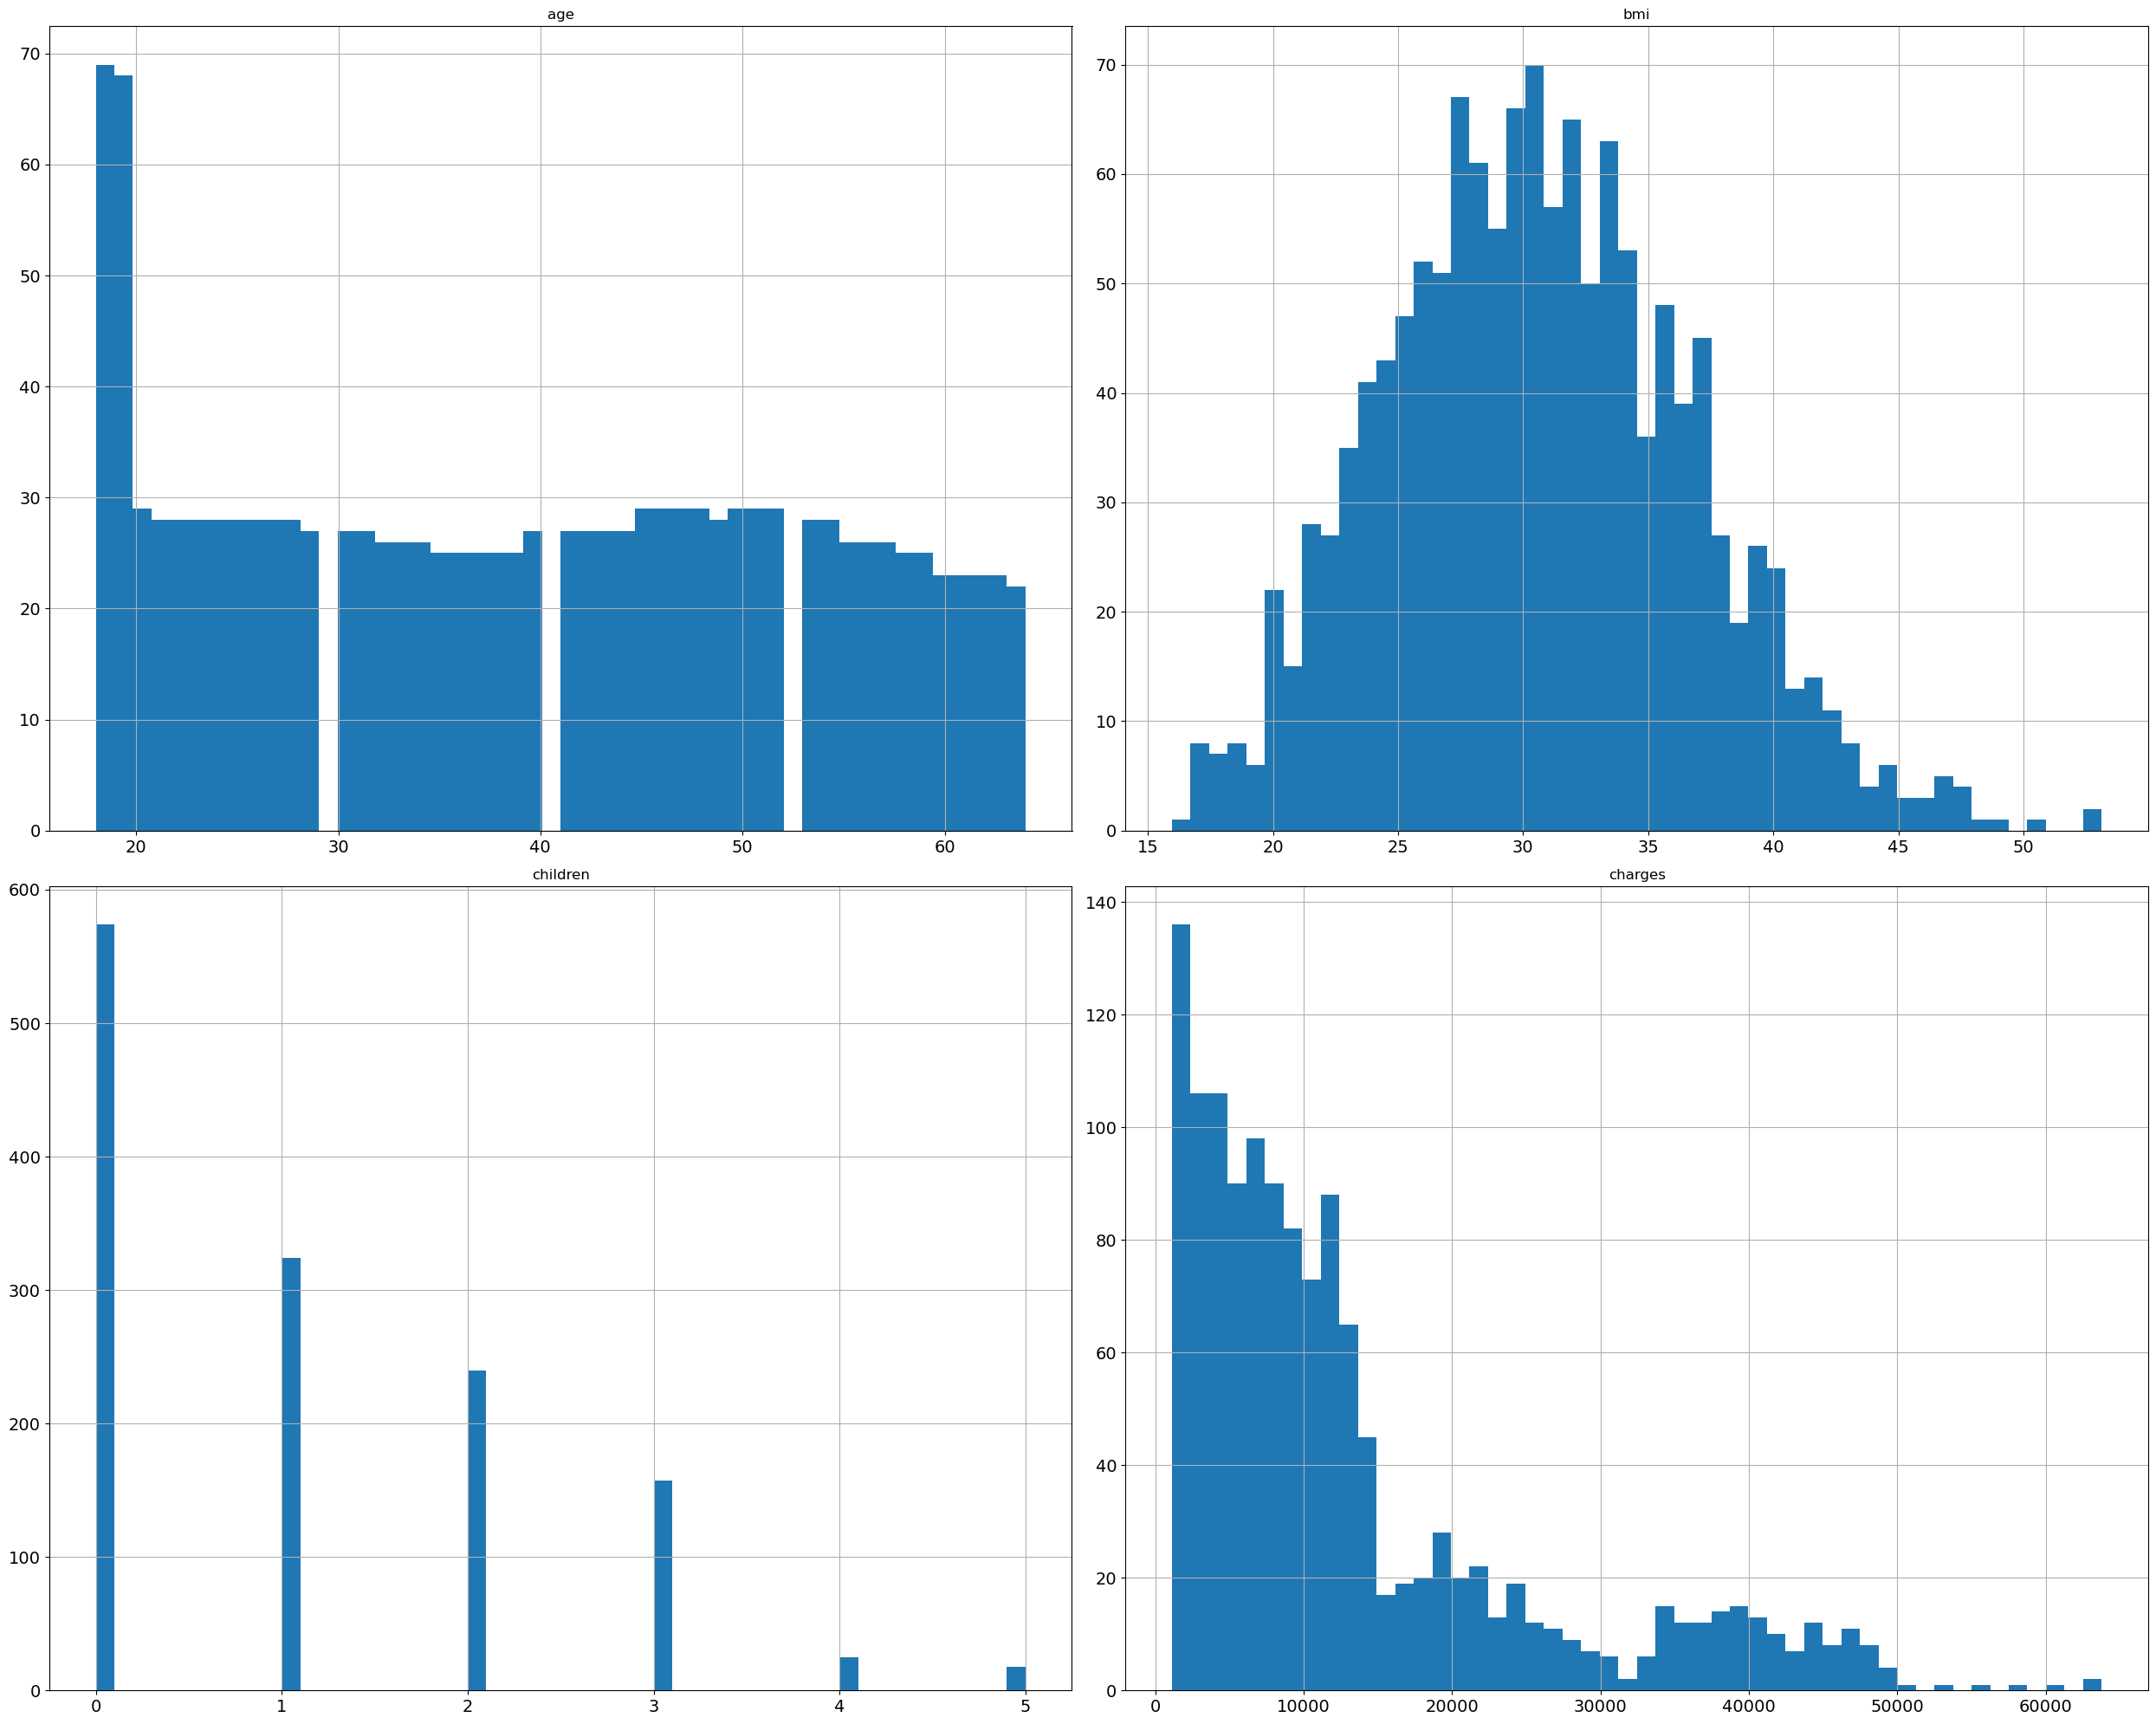

In [4]:
data.hist(bins=50, figsize=(25,20))
save_fig("attr_histograms")
plt.show()

In [5]:
np.random.seed(100500)

def split_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_set(data, 0.1)
print("Training set size:", len(train_set))
print("Testing set size:", len(test_set))

train_set.head()

Training set size: 1205
Testing set size: 133


,age,sex,bmi,children,smoker,region,charges
377,24,male,40.150,0,yes,southeast,38126.24650
262,52,male,24.320,3,yes,northeast,24869.83680
606,27,female,25.175,0,no,northeast,3558.62025
1001,24,male,32.700,0,yes,southwest,34472.84100
782,51,male,35.970,1,no,southeast,9386.16130


In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print("Training set size:", len(train_set))
print("Testing set size:", len(test_set))

train_set.head()

Training set size: 1070
Testing set size: 268


,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


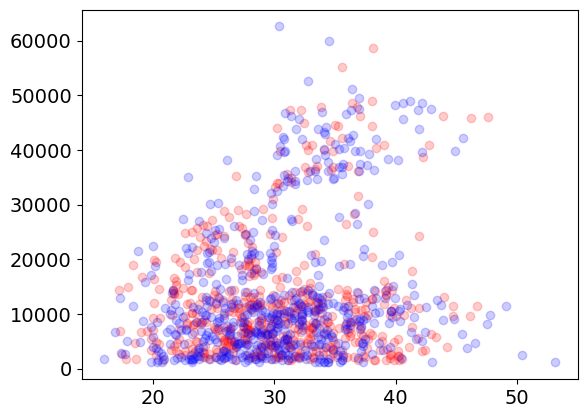

In [7]:
train_set_copy = train_set.copy()

female = train_set_copy[train_set_copy["sex"] == "female"]
male = train_set_copy[train_set_copy["sex"] == "male"]

plt.scatter(female["bmi"], female["charges"], alpha=0.2, label="female", c="red")
plt.scatter(male["bmi"], male["charges"], alpha=0.2, label="male", c="blue")

Saving figure scatter_matrix_plot


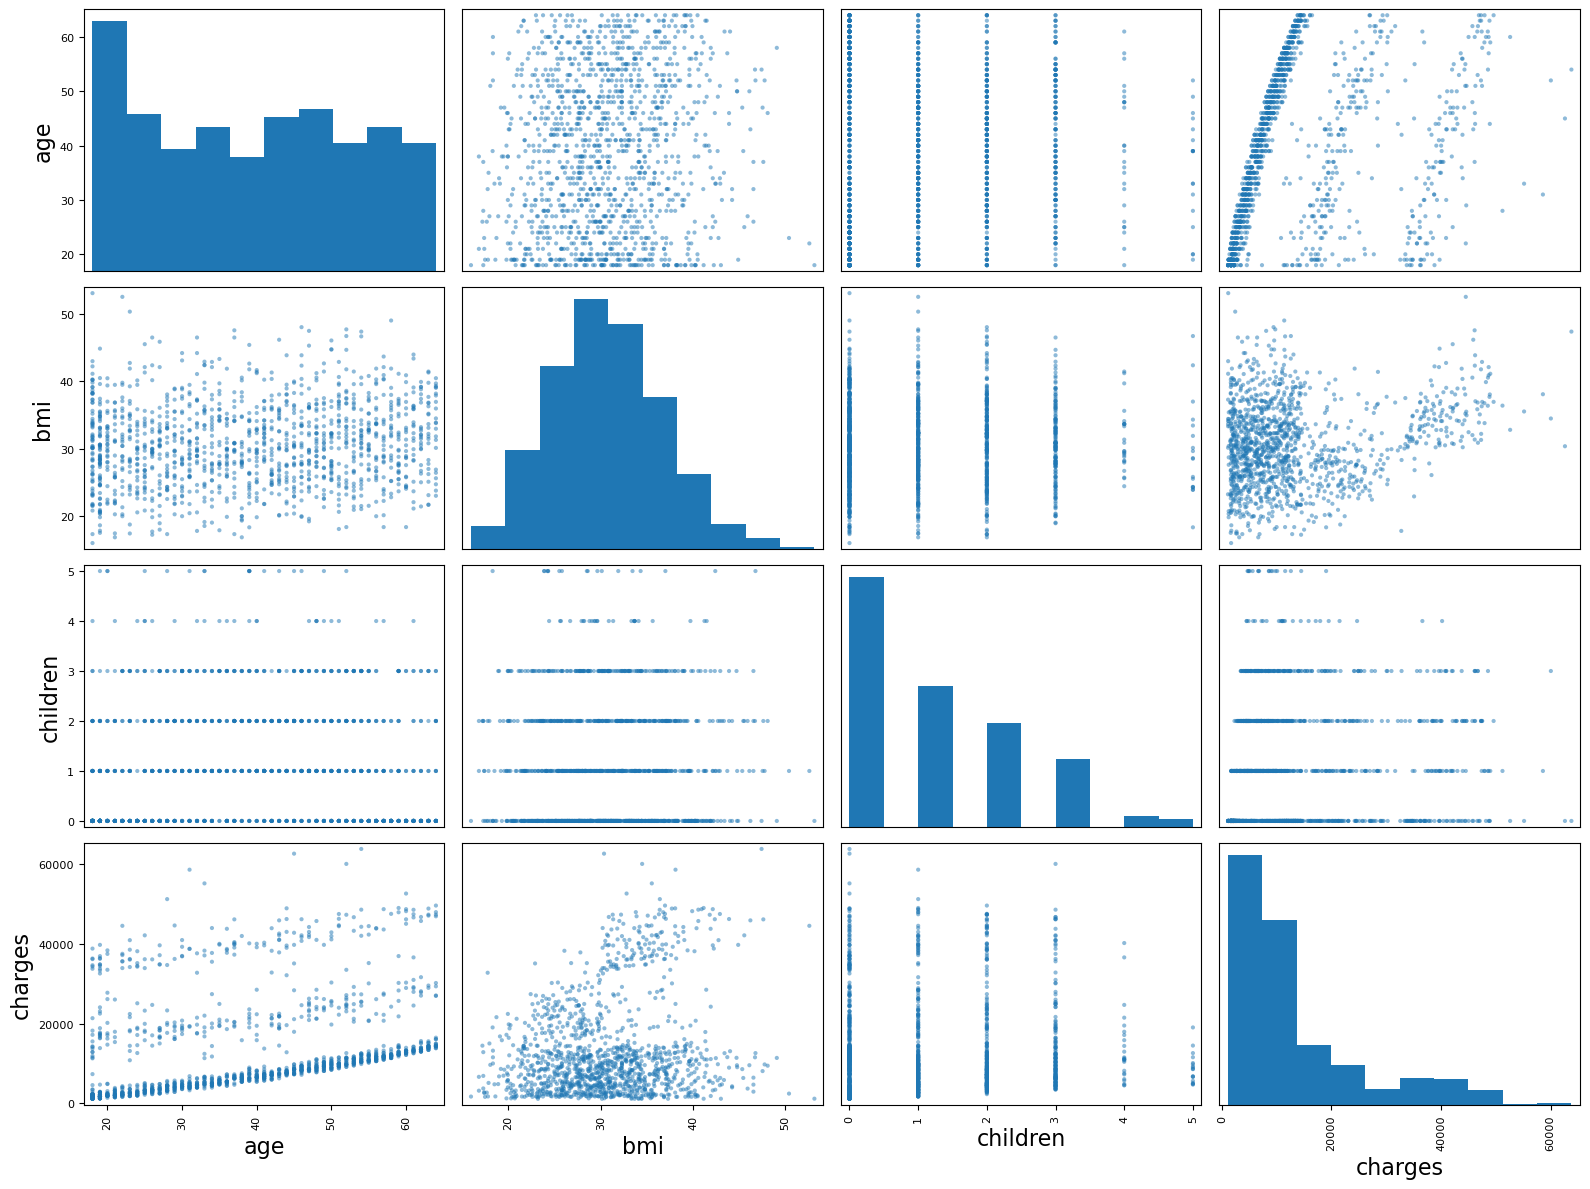

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["age", "bmi", "children", "charges"]
scatter_matrix(data[attributes], figsize=(16, 12))
save_fig("scatter_matrix_plot")

In [9]:
import pandas as pd

def apply_mappings(df, gender_mapping, smoker_mapping, region_mapping):
    df['sex'] = df['sex'].replace(gender_mapping).infer_objects(copy=False)
    df['smoker'] = df['smoker'].replace(smoker_mapping).infer_objects(copy=False)
    df['region'] = df['region'].replace(region_mapping).infer_objects(copy=False)
    return df

# Define mappings
gender_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {'northwest': 0, 'southwest': 1, "northeast" : 2, "southeast" : 3}

# Apply mappings to train_set
train_set = apply_mappings(pd.DataFrame(train_set), gender_mapping, smoker_mapping, region_mapping)

# Apply mappings to test_set
test_set = apply_mappings(pd.DataFrame(test_set), gender_mapping, smoker_mapping, region_mapping)

print(train_set)
print(test_set)

      age  sex     bmi  children  smoker  region      charges
560    46    1  19.950         2       0       0   9193.83850
1285   47    1  24.320         0       0       2   8534.67180
1142   52    1  24.860         0       0       3  27117.99378
969    39    1  34.320         5       0       3   8596.82780
486    54    1  21.470         3       0       0  12475.35130
...   ...  ...     ...       ...     ...     ...          ...
1095   18    1  31.350         4       0       2   4561.18850
1130   39    1  23.870         5       0       3   8582.30230
1294   58    0  25.175         0       0       2  11931.12525
860    37    1  47.600         2       1       1  46113.51100
1126   55    0  29.900         0       0       1  10214.63600

[1070 rows x 7 columns]
      age  sex     bmi  children  smoker  region      charges
764    45    1  25.175         2       0       2   9095.06825
887    36    1  30.020         0       0       0   5272.17580
890    64    1  26.885         0       1     

In [10]:
corr_matrix = train_set.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.008459,0.118274,0.060999,-0.052035,-0.024424,0.281721
sex,0.008459,1.000000,-0.015293,-0.017080,-0.070908,0.010862,-0.056802
bmi,0.118274,-0.015293,1.000000,-0.005040,-0.003450,0.179173,0.197316
children,0.060999,-0.017080,-0.005040,1.000000,0.013994,-0.034316,0.071885
smoker,-0.052035,-0.070908,-0.003450,0.013994,1.000000,0.056465,0.780063
region,-0.024424,0.010862,0.179173,-0.034316,0.056465,1.000000,0.065740
charges,0.281721,-0.056802,0.197316,0.071885,0.780063,0.065740,1.000000


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_set_original = train_set.copy()
test_set_original = test_set.copy()

train_set = train_set_original.drop("smoker", axis=1)
test_set = test_set_original.drop("smoker", axis=1)

train_set_labels = train_set_original["smoker"].copy()
test_set_labels = test_set_original["smoker"].copy()

full_pipeline = Pipeline([('std_scaler', StandardScaler()),])

train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

train_prepared.shape

(1070, 6)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(train_prepared, train_set_labels)

KNeighborsClassifier()

In [13]:
some_data = train_set.iloc[:20]
some_labels = train_set_labels.iloc[:20]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", kn_classifier.predict(some_data_prepared))

Predictions: [0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1]


In [14]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

test_predictions = kn_classifier.predict(test_prepared)
kn_mse = mean_squared_error(test_set_labels, test_predictions)
kn_rmse = np.sqrt(kn_mse)
print("KN RMSE: ", kn_rmse)
print("Confussion matrix:\n", confusion_matrix(test_set_labels, test_predictions), "\n")
print("Classification report:\n", classification_report(test_set_labels, test_predictions))

KN RMSE:  0.24433888871261045
Confussion matrix:
 [[205   9]
 [  7  47]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       214
           1       0.84      0.87      0.85        54

    accuracy                           0.94       268
   macro avg       0.90      0.91      0.91       268
weighted avg       0.94      0.94      0.94       268



In [26]:
kn_accuracy = accuracy_score(test_set_labels, test_predictions)*100
print(f"Accuracy of KN Classifier = {kn_accuracy}")

Accuracy of KN Classifier = 95.1492537313433


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kn_classifier, test_prepared, test_set_labels, scoring="neg_mean_squared_error", cv=10)
kn_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(kn_rmse_scores)

Scores: [0.27216553 0.27216553 0.33333333 0.33333333 0.43033148 0.27216553
 0.27216553 0.38490018 0.2773501  0.        ]
Mean: 0.2847910535054602
Standard deviation: 0.10849676825022488


In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(train_prepared, train_set_labels)

test_predictions = tree_classifier.predict(test_prepared)

tree_mse = mean_squared_error(test_set_labels, test_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Tree RMSE: ", tree_rmse)
print("Confussion matrix:\n", confusion_matrix(test_set_labels, test_predictions), "\n")
print("Classification report:\n", classification_report(test_set_labels, test_predictions))

Tree RMSE:  0.22024409796080158
Confussion matrix:
 [[204  10]
 [  3  51]] 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       214
           1       0.84      0.94      0.89        54

    accuracy                           0.95       268
   macro avg       0.91      0.95      0.93       268
weighted avg       0.96      0.95      0.95       268



In [29]:
tree_accuracy = accuracy_score(test_set_labels, test_predictions)*100
print(f"Accuracy of Decision Tree Classifier = {tree_accuracy}")

Accuracy of Decision Tree Classifier = 95.1492537313433


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_classifier, test_prepared, test_set_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.19245009 0.19245009 0.19245009 0.         0.33333333 0.27216553
 0.         0.38490018 0.         0.19611614]
Mean: 0.17638654440968024
Standard deviation: 0.13106633908754067


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_set_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006400,4.897849e-04,0.0014,4.897457e-04,False,2,3,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.074766,-0.037383,...,-0.059813,0.023158,6,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
1,0.016600,1.019889e-03,0.0018,3.999473e-04,False,2,10,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.042056,-0.032710,...,-0.044860,0.011293,4,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
2,0.006000,4.101908e-07,0.0016,4.898625e-04,False,3,3,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.037383,-0.023364,...,-0.039252,0.016874,1,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
3,0.018199,1.326949e-03,0.0020,1.907349e-07,False,3,10,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.042056,-0.014019,...,-0.040187,0.016079,2,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
4,0.006000,1.168008e-07,0.0012,4.001379e-04,False,4,3,"{'bootstrap': False, 'max_features': 4, 'n_est...",-0.056075,-0.023364,...,-0.048598,0.014658,5,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
5,0.019200,1.326597e-03,0.0016,4.899014e-04,False,4,10,"{'bootstrap': False, 'max_features': 4, 'n_est...",-0.037383,-0.032710,...,-0.042991,0.011598,3,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=10, high=200),
        'max_features': randint(low=1, high=5),
    }

forest_classifier = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_classifier, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, train_set_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025C5A740ED0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025C5A763150>},
                   random_state=42, scoring='neg_mean_squared_error')

In [34]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03483866, 0.00512591, 0.13157102, 0.01073437, 0.01192235,
       0.80580768])

In [35]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_prepared)

final_mse = mean_squared_error(test_set_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE: ", final_rmse)
print("Confussion matrix:\n", confusion_matrix(test_set_labels, final_predictions), "\n")
print("Classification report:\n", classification_report(test_set_labels, final_predictions))



Final RMSE:  0.20259510388803326
Confussion matrix:
 [[208   6]
 [  5  49]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       214
           1       0.89      0.91      0.90        54

    accuracy                           0.96       268
   macro avg       0.93      0.94      0.94       268
weighted avg       0.96      0.96      0.96       268

